In [1]:
import requests 
from bs4 import BeautifulSoup 
import pandas as pd
import warnings
from datetime import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Clustering NBA Players - A Statistical Analysis of Alike Players

### In this Project, I will take the last 10 years of NBA data from basketball reference and attempt to cluster players into different clusters based on performance! The Statistics are pulled using Baskeball Reference API and Beautiful Soup for Web Scraping. There are 25 numerical statistics that are used to create principal components and Kmeans clustering algorithm is used to build the clusters

## Step 1 - Scrape the Web for the Data

In [58]:
#Create an empty dataframe to hold the statistics

df = pd.DataFrame(columns = ['Season','Player','Pos','Age','Tm','G','GS','MP',
           'FG','FGA','FG%','3P','3PA','3P%','2P','2PA',
           '2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB',
           'AST','STL','BLK','TOV','PF','PTS'])

# Create the URL Object

current_year = datetime.today().isocalendar()[0]
start_year = current_year -3 ## Change this based on how many seasons you want
years_to_scrape = [i for i in range(start_year,current_year + 1)]
#get the data from basketball reference 

for i in years_to_scrape:
    year = str(i)
    print('Scraping Data from Basketball Reference for year',year)
    
    #pull the data with get request 
    try:
        URL = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'.format(year)
        r = requests.get(URL) 
    
    #create beautiful soup object and get the name of the table class to scrape
        soup = BeautifulSoup(r.content, 'html5lib') 
        
        for table in soup.find_all('table'):
            t_class = table.get('class')
            t_class = t_class[0] +' '+ t_class[1]
        
        #Get the statistic table
        
            table = soup.find('table', attrs = {'class': t_class}) 
        # Collecting Ddata
        
            for row in table.tbody.find_all('tr'):
                columns = row.find_all('td')
                
                try:
                    if columns != []:
                        player = columns[0].text.strip()
                        position = columns[1].text.strip()
                        age = int(columns[2].text.strip())
                        team = columns[3].text.strip()
                        games = float(columns[4].text.strip())
                        games_started = float(columns[5].text.strip())
                        minutes = float(columns[6].text.strip())
                        fg = float(columns[7].text.strip())
                        fga = float(columns[8].text.strip())
                        fg_per = float(columns[9].text.strip())
                        three = float(columns[10].text.strip())
                        three_attempted = float(columns[11].text.strip())
                        three_perc = float(columns[12].text.strip())
                        two = float(columns[13].text.strip())
                        two_attempted = float(columns[14].text.strip())
                        two_percentage = float(columns[15].text.strip())
                        efg_perc = float(columns[16].text.strip())
                        ft = float(columns[17].text.strip())
                        fta = float(columns[18].text.strip())
                        ft_perc = float(columns[19].text.strip())
                        orb = float(columns[20].text.strip())
                        drb = float(columns[21].text.strip())
                        trb = float(columns[22].text.strip())
                        ast = float(columns[23].text.strip())
                        stl = float(columns[24].text.strip())
                        blk = float(columns[25].text.strip())
                        tov = float(columns[26].text.strip())
                        pf = float(columns[27].text.strip())
                        pts = float(columns[28].text.strip()) 

                        df = df.append({'Season': year,
                        'Player':player,
                        'Pos':position,
                        'Age':age,
                        'Tm':team,
                        'G':games,
                        'GS':games_started,
                        'MP':minutes,
                        'FG':fg,
                        'FGA':fga,
                        'FG%':fg_per,
                        '3P':three,
                        '3PA':three_attempted,
                        '3P%':three_perc,
                        '2P':two,
                        '2PA':two_attempted,
                        '2P%':two_percentage,
                        'eFG%':efg_perc,
                        'FT':ft,
                        'FTA':fta,
                        'FT%':ft_perc,
                        'ORB':orb,
                        'DRB':drb,
                        'TRB':trb,
                        'AST':ast,
                        'STL':stl,
                        'BLK':blk,
                        'TOV':tov,
                        'PF':pf,
                        'PTS':pts,},
                         ignore_index=True)
                except Exception as e:
                    continue
        time.sleep(10)
                
    except Exception as e:
        print('Exception Raised', e)
        

Scraping Data from Basketball Reference for year 2020
Scraping Data from Basketball Reference for year 2021
Scraping Data from Basketball Reference for year 2022
Scraping Data from Basketball Reference for year 2023


In [59]:
# Preview the Data
df.head()

,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2020,Steven Adams,C,26,OKC,63.0,63.0,1680.0,283.0,478.0,...,0.582,207.0,376.0,583.0,146.0,51.0,67.0,94.0,122.0,684.0
1,2020,Bam Adebayo,PF,22,MIA,72.0,72.0,2417.0,440.0,790.0,...,0.691,176.0,559.0,735.0,368.0,82.0,93.0,204.0,182.0,1146.0
2,2020,LaMarcus Aldridge,C,34,SAS,53.0,53.0,1754.0,391.0,793.0,...,0.827,103.0,289.0,392.0,129.0,36.0,87.0,74.0,128.0,1001.0
3,2020,Nickeil Alexander-Walker,SG,21,NOP,47.0,1.0,591.0,98.0,266.0,...,0.676,9.0,75.0,84.0,89.0,17.0,8.0,54.0,57.0,267.0
4,2020,Grayson Allen,SG,24,MEM,38.0,0.0,718.0,117.0,251.0,...,0.867,8.0,77.0,85.0,52.0,10.0,2.0,33.0,53.0,330.0


## Step 2a - Analyze the Data and Prepare it for ML Algorithm

In [60]:
# Describe the Dataset numeric features 
#print(df.isna().sum()) --nacount = 0
df.describe()

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,...,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,42.189818,19.522099,961.509077,162.882399,352.226914,0.449083,50.347277,140.242699,0.321859,112.535122,...,0.755127,39.139700,134.007498,173.147198,99.343725,30.136543,18.365430,53.368193,78.858327,445.485793
std,22.556029,24.132941,732.335381,155.174986,326.329573,0.088444,55.003099,144.587934,0.123685,119.759063,...,0.144116,44.260982,124.272971,161.963512,114.789018,26.134765,22.455269,52.811172,58.306371,430.657955
min,1.000000,0.000000,4.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,1.000000,311.500000,40.000000,92.000000,0.403000,7.000000,23.000000,0.286000,24.000000,...,0.689250,10.000000,39.000000,51.000000,20.000000,8.000000,4.000000,14.000000,29.250000,107.000000
50%,44.000000,7.000000,815.000000,112.000000,248.000000,0.444000,31.000000,90.000000,0.341000,68.500000,...,0.774500,25.000000,99.000000,127.000000,59.000000,24.000000,11.000000,38.000000,69.000000,299.500000
75%,62.000000,35.000000,1526.750000,247.000000,533.750000,0.491000,77.000000,216.750000,0.384000,165.000000,...,0.845000,53.000000,195.000000,250.000000,128.750000,45.000000,24.000000,75.000000,119.000000,665.500000
max,83.000000,83.000000,2963.000000,774.000000,1564.000000,0.900000,337.000000,843.000000,1.000000,724.000000,...,1.000000,349.000000,813.000000,1019.000000,763.000000,138.000000,196.000000,312.000000,286.000000,2335.000000


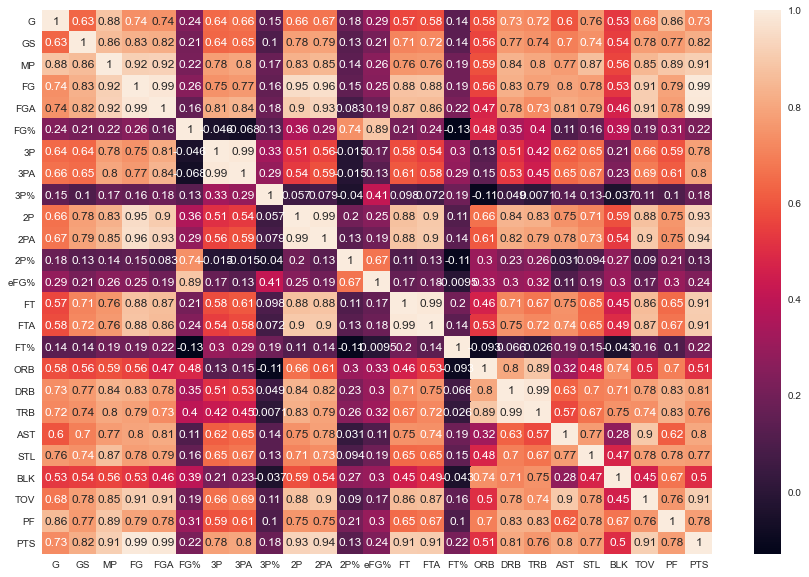

In [61]:
# Create a correlation plot of the features

plt.figure(figsize = (15,10))
    
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#Many of the features are highly correlated,
#so I will try to use a reduction technique

## 2b - Dimensionality Reduction with PCA
### Principal Component Analysis is a technique to reduce the dimensionality of the dataset but preserve the most important information contained in the dataset. Reducing dimensionality makes models easier to understand and also reduces eliminates multicollinearity in our dataset, which can lead to inaccurate inference.  PCA is sensitive to the range of the data, so I will scale with StandardScaler from SKlearn

In [62]:
from sklearn.preprocessing import StandardScaler

#create a scaler object and pass only numeric df values

scaler = StandardScaler()
nba_data = df.select_dtypes([np.number])
X = nba_data.values
print('Shape of the NBA dataset',X.shape)

#scale the data

scaler.fit(X)
nba_data = scaler.transform(X)

# Now we can run PCA on our dataset to reduce dimensionality and use a clustering algorithm

Shape of the NBA dataset (2534, 25)


[ 60.40700832  72.49578556  79.85907617  84.38093851  87.75977542
  90.79652457  92.78062063  94.11595993  95.36772866  96.35052614
  97.24444845  98.02780472  98.66960897  99.10545473  99.49924061
  99.69246208  99.83465356  99.91337979  99.95845438  99.98215758
 100.         100.         100.         100.         100.        ]


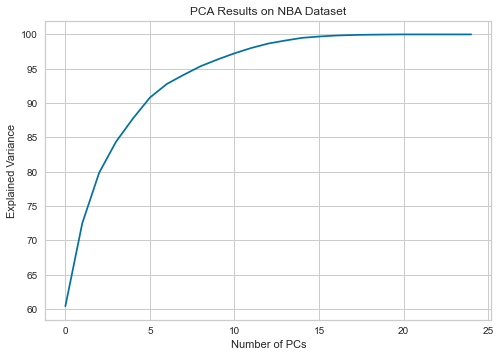

In [73]:
from sklearn.decomposition import PCA

# Create PCA Object with all 25 predictors 

pca_full = PCA(n_components = 25, random_state = 6810)
pca_full.fit(nba_data)
pca_nba = pca_full.transform(nba_data)

# The full dataset will explain 100% of the variance, we can use cumsum to get the running total 
#of variance explained by each principal component
print(np.cumsum(pca_full.explained_variance_ratio_ * 100))

# The first Principal component alone explaines ~60% of the variance!

#plot it

plt.plot(np.cumsum(pca_full.explained_variance_ratio_ * 100))
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.title('PCA Results on NBA Dataset')
plt.show()

#Based on the elbow graph, I will use the first 10 PCAs, 
#which explains !96% of the variation in the data

pca_full = PCA(n_components = 10, random_state = 6810)
pca_full.fit(nba_data)
pca_nba = pca_full.transform(nba_data)

## After performing PCA on the dataset, it is determined that 10 principal components is the optimal number to use based on the elbow graph. 10 PCs explains ~96% of the variation in the datset. Each PC is a linear combination of the features in our original dataset. 

## Part 3 - Kmeans Clustering 

### Kmeans clustering is one of the most popular clustering algorithms for grouping alike datapoints when we dont have labels (Unsupervised Learning). Kmeans calculates cluster centers (means) and assigns datapoints to the closest cluster center. Since Kmeans is a distance based algorithm, scaling the data in important to have accurate inference. To find the optimal number of clusters, I will use the elbow method.

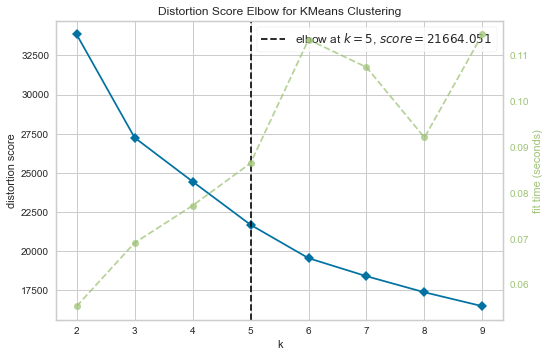

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Use the elbow method to find K number of clusters for Kmeans

km = KMeans(random_state=7401)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(pca_nba)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Elbow plot shows to use 5 clusters

### Based on the elbow graph, 5 clusters is optimal for the dataset. However, since we have a lot of datapoints, I am going to use 6 clusters to further seperate the players into clusters based on their playing style

In [76]:
# Create clusters
kmeans = KMeans(n_clusters = 6)
kmeans.fit(pca_nba)
y_labels = kmeans.labels_

# Create a dataset with cluster assignments, PC values, and player name and year

results_df = pd.DataFrame()
results_df ['Player'] = df['Player']
results_df['Cluster'] = [lab + 1 for lab in y_labels]
results_df['Season'] = df['Season']

for i in range(10):
    pc = pca_nba[:,i]
    col = 'PC_{}'.format(str(i +1))
    results_df[col] = pc
    
results_df.head()

,Player,Cluster,Season,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,Steven Adams,3,2020,4.691900,4.155801,-2.167307,-0.569046,-0.468537,1.471882,0.361421,0.466174,-0.844762,0.144182
1,Bam Adebayo,3,2020,9.179504,3.124502,-3.968718,0.883703,-0.906413,0.664666,1.146049,0.739880,0.267129,0.504996
2,LaMarcus Aldridge,3,2020,4.903043,1.203852,-1.083441,-0.109657,-1.472075,1.050426,-1.219097,0.841243,0.648405,-0.452549
3,Nickeil Alexander-Walker,4,2020,-1.818202,-1.347653,-0.333914,-0.400957,0.516570,0.646667,0.145158,-0.556221,0.192339,0.013137
4,Grayson Allen,6,2020,-1.642087,-0.072312,1.617715,0.219587,-0.512494,-0.160180,-0.178467,-0.501302,-0.122796,0.074652


## We now have our result set with 10, PCs, but in order to plot the clusters, I will create 2 more result sets using 2 PCs and 3PCs respectively

## 2 PCs

In [77]:
#create it with 2 PCs in order to plot

pca_full = PCA(n_components = 2, random_state = 6810)
pca_full.fit(nba_data)
pca_nba = pca_full.transform(nba_data)

kmeans = KMeans(n_clusters = 6)
kmeans.fit(pca_nba)
y_labels = kmeans.labels_

In [78]:
#plot the data 

df['x_axis'] = pca_nba[:,0]
df['y_axis'] = pca_nba[:,1]
df['Cluster'] = [lab + 1 for lab in y_labels]

import plotly.express as px

px.scatter(df, x = 'x_axis', y = 'y_axis', color = 'Cluster',hover_data = ['Player','Season','Tm'])

## The Data is seperated nicely in the 2D space. Will visualize it in 3D space

In [80]:
#create it with 2 PCs in order to plot

pca_full = PCA(n_components = 3, random_state = 6810)
pca_full.fit(nba_data)
pca_nba = pca_full.transform(nba_data)

kmeans = KMeans(n_clusters = 8)
kmeans.fit(pca_nba)
y_labels = kmeans.labels_

#plot the data 

df['x_axis'] = pca_nba[:,0]
df['y_axis'] = pca_nba[:,1]
df['z_axis'] = pca_nba[:,2]

df['Cluster'] = [lab + 1 for lab in y_labels]

import plotly.express as px

px.scatter_3d(df, x = 'x_axis', y = 'y_axis', z = 'z_axis', color = 'Cluster',hover_data = ['Player','Season','Tm'])

## Post Analysis

#### In the 2D plot, most of the NBA "superstars" appear in cluster 5, including Joel Embiid, Kevin Durant, LeBron James, Nikola Jokic and Stephen Curry. In 3D, these players are mostly appearing in cluster 6. By identifying players who are alike using clustering, NBA GMs can potentially sign great players for less money than paying big name superstars. This technique can also be used to help identify trade targets

### Thanks for checking out my Kmeans clustering project on NBA players!!